In [89]:
### note: to read .snappy.parquet, install below:
### conda install -c conda-forge python-snappy fastparquet snappy

import numpy as np 
import dask
import pandas as pd
import os 
import glob

from datetime import datetime as dt
from datetime import timedelta

from scipy import stats
from scipy.stats import pearsonr

import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
from matplotlib.gridspec import GridSpec
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [102]:
start = dt.strptime('2019-12-30', '%Y-%m-%d')
end   = dt.strptime('2021-05-02', '%Y-%m-%d')

def daterange(_start, _end):
    for n in range((_end - _start).days):
        yield _start + timedelta(n)

dates = []
for i in daterange(start, end):
    dates.append(i)

In [104]:
# dates

In [90]:
dataroot = "D:/WB_India/"

In [91]:
# df = pd.read_parquet(path+'part-00636-tid-6040673008050026975-9cd2474a-6625-4181-aebf-5b1cd38539d8-2607-1.c000.snappy.parquet', engine='fastparquet')

In [92]:
file_dates = glob.glob(dataroot+"date=*/")
# file_dates

# check number of logs etc.

In [94]:
d_totallogs = {}
d_totalids  = {}
d_chennailogs = {}
d_chennaiids  = {}
for file_date in file_dates:
    date = file_date.split("=")[1].split("\\")[0]
    parqs= glob.glob(file_date+"part-*.parquet")
    totallogs = 0
    totalids  = 0
    chennailogs = 0
    chennaiids  = 0
    for parq in parqs:
        df = pd.read_parquet(parq, engine='fastparquet')
        totallogs += len(df)
        totalids  += len(set(df["device_id"]))
        if "in_h3_8_aoi" in df.columns:
            dfx = df[~df["in_h3_8_aoi"].isnull()]
            chennailogs += len(dfx)
            chennaiids  += len(set(dfx["device_id"]))    
        elif "h3_8_aoi" in df.columns:
            dfx = df[~df["h3_8_aoi"].isnull()]
            chennailogs += len(dfx)
            chennaiids  += len(set(dfx["device_id"]))          
        else: 
            print(df.columns)
    d_totallogs[date] = totallogs
    d_totalids[date]  = totalids
    d_chennailogs[date] = chennailogs
    d_chennaiids[date]  = chennaiids
    print("done",date)

done 2019-12-30
done 2019-12-31
done 2020-01-01
done 2020-01-02
done 2020-01-03
done 2020-01-04
done 2020-01-05
done 2020-01-06
done 2020-01-07
done 2020-01-08
done 2020-01-09
done 2020-01-10
done 2020-01-11
done 2020-01-12
done 2020-01-13
done 2020-01-14
done 2020-01-15
done 2020-01-16
done 2020-01-17
done 2020-01-18
done 2020-01-19
done 2020-01-20
done 2020-01-21
done 2020-01-22
done 2020-01-23
done 2020-01-24
done 2020-01-25
done 2020-01-26
done 2020-01-27
done 2020-01-28
done 2020-01-29
done 2020-01-30
done 2020-01-31
done 2020-02-01
done 2020-02-02
done 2020-02-03
done 2020-02-04
done 2020-02-05
done 2020-02-06
done 2020-02-07
done 2020-02-08
done 2020-02-09
done 2020-02-10
done 2020-02-11
done 2020-02-12
done 2020-02-13
done 2020-02-14
done 2020-02-15
done 2020-02-16
done 2020-02-17
done 2020-02-18
done 2020-02-19
done 2020-02-20
done 2020-02-21
done 2020-02-22
done 2020-02-23
done 2020-02-24
done 2020-02-25
done 2020-02-26
done 2020-02-27
done 2020-02-28
done 2020-02-29
done 202

In [136]:
d_totallogs

{'2019-12-30': 3972080,
 '2019-12-31': 3956376,
 '2020-01-01': 3239722,
 '2020-01-02': 3066289,
 '2020-01-03': 3187064,
 '2020-01-04': 5391965,
 '2020-01-05': 4353500,
 '2020-01-06': 1762025,
 '2020-01-07': 3021631,
 '2020-01-08': 1768267,
 '2020-01-09': 4055193,
 '2020-01-10': 2766369,
 '2020-01-11': 2312459,
 '2020-01-12': 3334482,
 '2020-01-13': 3686660,
 '2020-01-14': 2145497,
 '2020-01-15': 2903402,
 '2020-01-16': 1348993,
 '2020-01-17': 979378,
 '2020-01-18': 838391,
 '2020-01-19': 1515986,
 '2020-01-20': 2611969,
 '2020-01-21': 1286554,
 '2020-01-22': 1916986,
 '2020-01-23': 1319898,
 '2020-01-24': 1236334,
 '2020-01-25': 1223567,
 '2020-01-26': 1553986,
 '2020-01-27': 1252708,
 '2020-01-28': 1757105,
 '2020-01-29': 1801798,
 '2020-01-30': 3512768,
 '2020-01-31': 1979500,
 '2020-02-01': 4549741,
 '2020-02-02': 4303923,
 '2020-02-03': 3019187,
 '2020-02-04': 2949093,
 '2020-02-05': 1210665,
 '2020-02-06': 5783034,
 '2020-02-07': 4238126,
 '2020-02-08': 3608024,
 '2020-02-09': 346

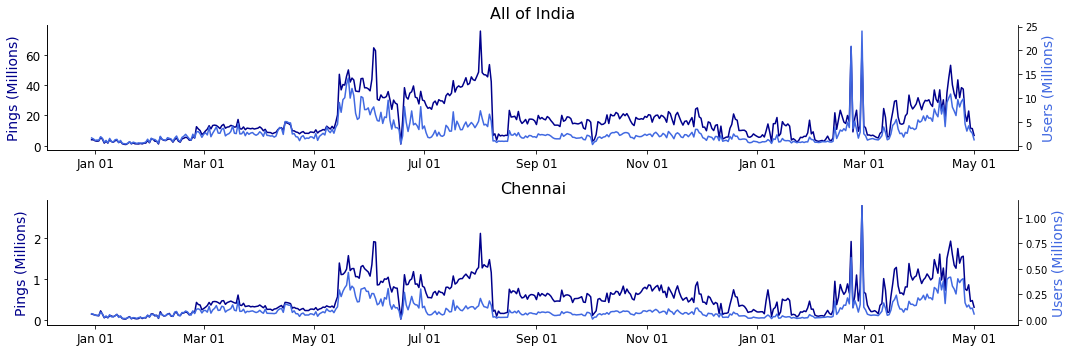

In [186]:
fig = plt.figure(figsize=(15,5))
gs=GridSpec(2,1)
ax0=fig.add_subplot(gs[0,0]) 
ax1=fig.add_subplot(gs[1,0]) 

def plotthis(logs,ids,title,ax0):
    ax0.plot(dates, np.asarray(list(logs.values()))/1000000, label="Total Pings", color="darkblue")
    axx = ax0.twinx()
    axx.plot(dates, np.asarray(list(ids.values()))/1000000, label="Unique IDs", color="royalblue")
    ax0.xaxis.set_major_formatter(DateFormatter('%b %d'))
    ax0.spines['right'].set_visible(False)
    ax0.spines['top'].set_visible(False)
#     axx.spines['right'].set_visible(False)
    axx.spines['top'].set_visible(False)
    ax0.tick_params(axis='x', labelsize=12)
    ax0.tick_params(axis='y', labelsize=12)
#     ax0.set_xlim("2020-01-01", "2021-05-01")
    ax0.set_title(title, fontsize=16, pad=7)
    ax0.set_ylabel("Pings (Millions)", fontsize=14, color="darkblue")
    axx.set_ylabel("Users (Millions)", fontsize=14, color="royalblue")
#     ax0.legend(ncol=1, fontsize=10.5,  loc="lower left", 
#                    bbox_to_anchor=(0,0), labelspacing=0.1)
    
plotthis(d_totallogs,d_totalids,"All of India",ax0)
plotthis(d_chennailogs,d_chennaiids,"Chennai",ax1)

plt.tight_layout()
# plt.savefig("C:/users/yabec/desktop/localrisks.png",dpi=200, bbox_inches='tight')
plt.show()

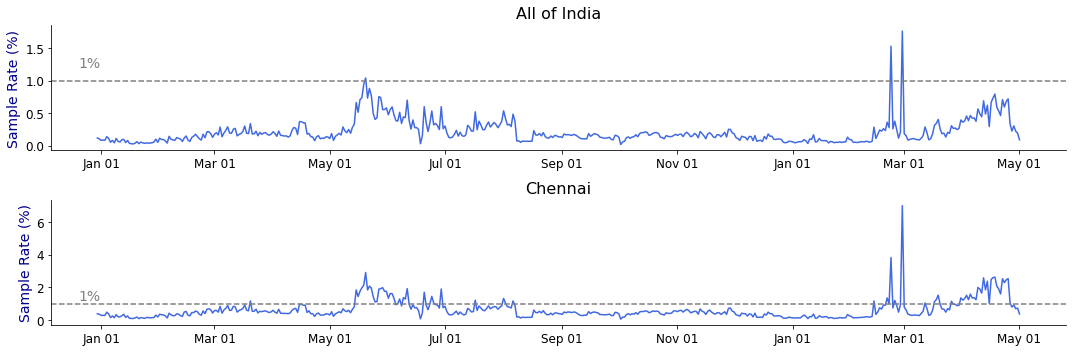

In [187]:
fig = plt.figure(figsize=(15,5))
gs=GridSpec(2,1)
ax0=fig.add_subplot(gs[0,0]) 
ax1=fig.add_subplot(gs[1,0]) 

def plotthis(logs,ids,title,ax0,pop):
    ax0.plot(dates, (np.asarray(list(ids.values()))/1000000/pop)*100, label="Sample Rate", color="royalblue")
    ax0.xaxis.set_major_formatter(DateFormatter('%b %d'))
    ax0.spines['right'].set_visible(False)
    ax0.spines['top'].set_visible(False)
#     axx.spines['right'].set_visible(False)
    ax0.tick_params(axis='x', labelsize=12)
    ax0.tick_params(axis='y', labelsize=12)
#     ax0.set_xlim("2020-01-01", "2021-05-01")
    ax0.set_title(title, fontsize=16, pad=7)
#     ax0.set_yscale("log")
    ax0.set_ylabel("Sample Rate (%)", fontsize=14, color="darkblue")
    ax0.axhline(1, color="gray", linestyle="--")
    ax0.text(dt(2019, 12, 20), 1.2, "1%", color="gray", fontsize=14)
#     axx.set_ylabel("Users (Millions)", fontsize=14, color="royalblue")
#     ax0.legend(ncol=1, fontsize=10.5,  loc="lower left", 
#                    bbox_to_anchor=(0,0), labelspacing=0.1)
    
plotthis(d_totallogs,d_totalids,"All of India",ax0,1366)
plotthis(d_chennailogs,d_chennaiids,"Chennai",ax1,16)

plt.tight_layout()
# plt.savefig("C:/users/yabec/desktop/localrisks.png",dpi=200, bbox_inches='tight')
plt.show()

India population: ~1.3 billion
Chennai population: ~10 million

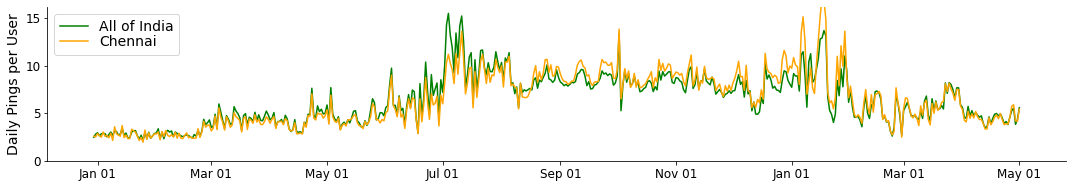

In [188]:
fig = plt.figure(figsize=(15,5))
gs=GridSpec(2,1)
ax0=fig.add_subplot(gs[0,0]) 
# ax1=fig.add_subplot(gs[1,0]) 

def plotthis(logs,ids,title,ax0, col):
    ax0.plot(dates, np.asarray(list(logs.values()))/np.asarray(list(ids.values())), 
             label=title, color=col)
#     axx = ax0.twinx()
#     axx.plot(dates, ids.values(), label="Unique IDs", color="skyblue")
    ax0.xaxis.set_major_formatter(DateFormatter('%b %d'))
    ax0.spines['right'].set_visible(False)
    ax0.spines['top'].set_visible(False)
    ax0.tick_params(axis='x', labelsize=12)
    ax0.tick_params(axis='y', labelsize=12)
    ax0.set_ylim(0)
#     ax0.set_xlim("2020-01-01", "2021-05-01")
#     ax0.set_title(title, fontsize=16, pad=7)
    ax0.set_ylabel("Daily Pings per User", fontsize=14, color="k")
#     axx.set_ylabel("Users", fontsize=14, color="skyblue")
    ax0.legend(ncol=1, fontsize=14,  loc="upper left", 
                   bbox_to_anchor=(0,1), labelspacing=0.1)
    
plotthis(d_totallogs,d_totalids,"All of India",ax0,"g")
plotthis(d_chennailogs,d_chennaiids,"Chennai",ax0,"orange")

plt.tight_layout()
# plt.savefig("C:/users/yabec/desktop/localrisks.png",dpi=200, bbox_inches='tight')
plt.show()

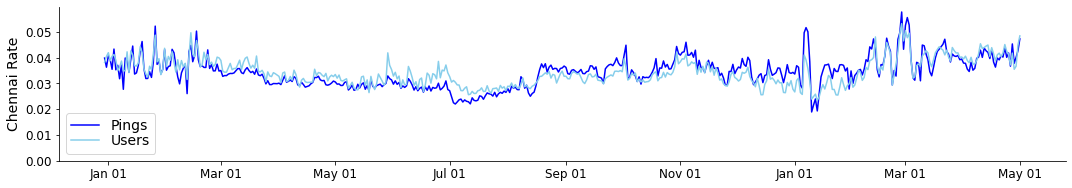

In [189]:
fig = plt.figure(figsize=(15,5))
gs=GridSpec(2,1)
ax0=fig.add_subplot(gs[0,0]) 
# ax1=fig.add_subplot(gs[1,0]) 

def plotthis(che,ind,title,ax0, col):
    ax0.plot(dates, np.asarray(list(che.values()))/np.asarray(list(ind.values())), 
             label=title, color=col)
    ax0.xaxis.set_major_formatter(DateFormatter('%b %d'))
    ax0.spines['right'].set_visible(False)
    ax0.spines['top'].set_visible(False)
    ax0.tick_params(axis='x', labelsize=12)
    ax0.tick_params(axis='y', labelsize=12)
    ax0.set_ylim(0)
#     ax0.set_xlim("2020-01-01", "2021-05-01")
#     ax0.set_title(title, fontsize=16, pad=7)
    ax0.set_ylabel("Chennai Rate", fontsize=14, color="k")
#     axx.set_ylabel("Users", fontsize=14, color="skyblue")
    ax0.legend(ncol=1, fontsize=14,  loc="lower left", 
                   bbox_to_anchor=(0,0), labelspacing=0.1)
    
plotthis(d_chennailogs,d_totallogs,"Pings",ax0,"b")
plotthis(d_chennaiids,d_totalids,"Users",ax0,"skyblue")

plt.tight_layout()
# plt.savefig("C:/users/yabec/desktop/localrisks.png",dpi=200, bbox_inches='tight')
plt.show()

In [185]:
chennaiIDs = ["a","b"]
for file_date in file_dates:
    date = file_date.split("=")[1].split("\\")[0]
    parqs= glob.glob(file_date+"part-*.parquet")
    for parq in parqs:
        df = pd.read_parquet(parq, engine='fastparquet')
        if "in_h3_8_aoi" in df.columns:
            dfx = df[~df["in_h3_8_aoi"].isnull()]
            chennaiIDs.extend(list(set(dfx["device_id"].values)))
        elif "h3_8_aoi" in df.columns:
            dfx = df[~df["h3_8_aoi"].isnull()]
            chennaiIDs.extend(list(set(dfx["device_id"].values)))
        else: 
            print(df.columns)
    print("done",date,len(chennaiIDs))
    chennaiIDs = list(set(chennaiIDs))
    print("done",date,len(chennaiIDs))

done 2019-12-30 61289
done 2019-12-30 46755
done 2019-12-31 103793
done 2019-12-31 77613
done 2020-01-01 123612
done 2020-01-01 97011
done 2020-01-02 142479
done 2020-01-02 116738
done 2020-01-03 162113
done 2020-01-03 133673
done 2020-01-04 210773
done 2020-01-04 158387
done 2020-01-05 217977
done 2020-01-05 176602
done 2020-01-06 201024
done 2020-01-06 184403
done 2020-01-07 223971
done 2020-01-07 195485
done 2020-01-08 218077
done 2020-01-08 202586
done 2020-01-09 255088
done 2020-01-09 217325
done 2020-01-10 248095
done 2020-01-10 224839
done 2020-01-11 256630
done 2020-01-11 236691
done 2020-01-12 278676
done 2020-01-12 246435
done 2020-01-13 302551
done 2020-01-13 264033
done 2020-01-14 289783
done 2020-01-14 274008
done 2020-01-15 314029
done 2020-01-15 287496
done 2020-01-16 304450
done 2020-01-16 293405
done 2020-01-17 308859
done 2020-01-17 298948
done 2020-01-18 314205
done 2020-01-18 304826
done 2020-01-19 325900
done 2020-01-19 314537
done 2020-01-20 343899
done 2020-01-20

done 2020-06-21 2097166
done 2020-06-22 2197203
done 2020-06-22 2105555
done 2020-06-23 2263574
done 2020-06-23 2123459
done 2020-06-24 2354666
done 2020-06-24 2141545
done 2020-06-25 2309212
done 2020-06-25 2156358
done 2020-06-26 2306286
done 2020-06-26 2174753
done 2020-06-27 2321842
done 2020-06-27 2191135
done 2020-06-28 2308558
done 2020-06-28 2199519
done 2020-06-29 2502927
done 2020-06-29 2260840
done 2020-06-30 2381317
done 2020-06-30 2270329
done 2020-07-01 2404579
done 2020-07-01 2282292
done 2020-07-02 2364010
done 2020-07-02 2288931
done 2020-07-03 2342743
done 2020-07-03 2294523
done 2020-07-04 2344190
done 2020-07-04 2300135
done 2020-07-05 2353683
done 2020-07-05 2307136
done 2020-07-06 2377062
done 2020-07-06 2315035
done 2020-07-07 2401950
done 2020-07-07 2325057
done 2020-07-08 2379419
done 2020-07-08 2332615
done 2020-07-09 2411378
done 2020-07-09 2343118
done 2020-07-10 2402916
done 2020-07-10 2351244
done 2020-07-11 2400934
done 2020-07-11 2357430
done 2020-07-12 

KeyboardInterrupt: 

In [88]:
### check column names 

for file_date in file_dates:
    date = file_date.split("=")[1].split("\\")[0]
    parqs= glob.glob(file_date+"part-*.parquet")
    for parq in parqs:
        df = pd.read_parquet(parq, engine='fastparquet')
        if "in_h3_8_aoi" not in df.columns:
            print(df.columns)
    print(date)

2019-12-30
2019-12-31
2020-01-01
2020-01-02
2020-01-03
2020-01-04
2020-01-05
2020-01-06
2020-01-07
2020-01-08
2020-01-09
2020-01-10
2020-01-11
2020-01-12
2020-01-13
2020-01-14
2020-01-15
2020-01-16
2020-01-17
2020-01-18
2020-01-19
2020-01-20
2020-01-21
2020-01-22
2020-01-23
2020-01-24
2020-01-25
2020-01-26
2020-01-27
2020-01-28
2020-01-29
2020-01-30
2020-01-31
2020-02-01
2020-02-02
2020-02-03
2020-02-04
2020-02-05
2020-02-06
2020-02-07
2020-02-08
2020-02-09
2020-02-10
2020-02-11
2020-02-12
2020-02-13
2020-02-14
2020-02-15
2020-02-16
2020-02-17
2020-02-18
2020-02-19
2020-02-20
2020-02-21
2020-02-22
2020-02-23
2020-02-24
2020-02-25
2020-02-26
2020-02-27
2020-02-28
2020-02-29
2020-03-01
2020-03-02
2020-03-03
2020-03-04
2020-03-05
2020-03-06
2020-03-07
2020-03-08
2020-03-09
2020-03-10
2020-03-11
2020-03-12
2020-03-13
2020-03-14
2020-03-15
2020-03-16
2020-03-17
2020-03-18
2020-03-19
2020-03-20
2020-03-21
2020-03-22
2020-03-23
2020-03-24
2020-03-25
2020-03-26
2020-03-27
2020-03-28
2020-03-29

In [17]:
for name in glob.glob(dataroot+"*/*.parquet"):
    print(name)

D:/WB_India\date=2019-12-30\part-00653-tid-6040673008050026975-9cd2474a-6625-4181-aebf-5b1cd38539d8-2624-1.c000.snappy.parquet
D:/WB_India\date=2019-12-30\part-01085-tid-6040673008050026975-9cd2474a-6625-4181-aebf-5b1cd38539d8-3056-1.c000.snappy.parquet
D:/WB_India\date=2019-12-31\part-00639-tid-6040673008050026975-9cd2474a-6625-4181-aebf-5b1cd38539d8-2610-1.c000.snappy.parquet
D:/WB_India\date=2019-12-31\part-01087-tid-6040673008050026975-9cd2474a-6625-4181-aebf-5b1cd38539d8-3058-1.c000.snappy.parquet
D:/WB_India\date=2020-01-01\part-00636-tid-6040673008050026975-9cd2474a-6625-4181-aebf-5b1cd38539d8-2607-1.c000.snappy.parquet
D:/WB_India\date=2020-01-01\part-01112-tid-6040673008050026975-9cd2474a-6625-4181-aebf-5b1cd38539d8-3083-1.c000.snappy.parquet
D:/WB_India\date=2020-01-02\part-00651-tid-6040673008050026975-9cd2474a-6625-4181-aebf-5b1cd38539d8-2622-1.c000.snappy.parquet
D:/WB_India\date=2020-01-02\part-01113-tid-6040673008050026975-9cd2474a-6625-4181-aebf-5b1cd38539d8-3084-1.c000

D:/WB_India\date=2020-07-08\part-01637-tid-6040673008050026975-9cd2474a-6625-4181-aebf-5b1cd38539d8-3608-13.c000.snappy.parquet
D:/WB_India\date=2020-07-08\part-01638-tid-6040673008050026975-9cd2474a-6625-4181-aebf-5b1cd38539d8-3609-13.c000.snappy.parquet
D:/WB_India\date=2020-07-08\part-01639-tid-6040673008050026975-9cd2474a-6625-4181-aebf-5b1cd38539d8-3610-14.c000.snappy.parquet
D:/WB_India\date=2020-07-08\part-01640-tid-6040673008050026975-9cd2474a-6625-4181-aebf-5b1cd38539d8-3611-10.c000.snappy.parquet
D:/WB_India\date=2020-07-08\part-01641-tid-6040673008050026975-9cd2474a-6625-4181-aebf-5b1cd38539d8-3612-14.c000.snappy.parquet
D:/WB_India\date=2020-07-08\part-01642-tid-6040673008050026975-9cd2474a-6625-4181-aebf-5b1cd38539d8-3613-14.c000.snappy.parquet
D:/WB_India\date=2020-07-08\part-01643-tid-6040673008050026975-9cd2474a-6625-4181-aebf-5b1cd38539d8-3614-11.c000.snappy.parquet
D:/WB_India\date=2020-07-08\part-01644-tid-6040673008050026975-9cd2474a-6625-4181-aebf-5b1cd38539d8-3615

D:/WB_India\date=2020-08-19\part-01674-tid-6040673008050026975-9cd2474a-6625-4181-aebf-5b1cd38539d8-3645-32.c000.snappy.parquet
D:/WB_India\date=2020-08-19\part-01675-tid-6040673008050026975-9cd2474a-6625-4181-aebf-5b1cd38539d8-3646-28.c000.snappy.parquet
D:/WB_India\date=2020-08-19\part-01676-tid-6040673008050026975-9cd2474a-6625-4181-aebf-5b1cd38539d8-3647-27.c000.snappy.parquet
D:/WB_India\date=2020-08-19\part-01678-tid-6040673008050026975-9cd2474a-6625-4181-aebf-5b1cd38539d8-3649-28.c000.snappy.parquet
D:/WB_India\date=2020-08-19\part-01681-tid-6040673008050026975-9cd2474a-6625-4181-aebf-5b1cd38539d8-3652-25.c000.snappy.parquet
D:/WB_India\date=2020-08-19\part-01682-tid-6040673008050026975-9cd2474a-6625-4181-aebf-5b1cd38539d8-3653-24.c000.snappy.parquet
D:/WB_India\date=2020-08-19\part-01683-tid-6040673008050026975-9cd2474a-6625-4181-aebf-5b1cd38539d8-3654-30.c000.snappy.parquet
D:/WB_India\date=2020-08-19\part-01685-tid-6040673008050026975-9cd2474a-6625-4181-aebf-5b1cd38539d8-3656

D:/WB_India\date=2020-11-02\part-01708-tid-6040673008050026975-9cd2474a-6625-4181-aebf-5b1cd38539d8-3679-48.c000.snappy.parquet
D:/WB_India\date=2020-11-02\part-01710-tid-6040673008050026975-9cd2474a-6625-4181-aebf-5b1cd38539d8-3681-47.c000.snappy.parquet
D:/WB_India\date=2020-11-02\part-01711-tid-6040673008050026975-9cd2474a-6625-4181-aebf-5b1cd38539d8-3682-46.c000.snappy.parquet
D:/WB_India\date=2020-11-02\part-01715-tid-6040673008050026975-9cd2474a-6625-4181-aebf-5b1cd38539d8-3686-36.c000.snappy.parquet
D:/WB_India\date=2020-11-02\part-01716-tid-6040673008050026975-9cd2474a-6625-4181-aebf-5b1cd38539d8-3687-52.c000.snappy.parquet
D:/WB_India\date=2020-11-02\part-01717-tid-6040673008050026975-9cd2474a-6625-4181-aebf-5b1cd38539d8-3688-49.c000.snappy.parquet
D:/WB_India\date=2020-11-02\part-01720-tid-6040673008050026975-9cd2474a-6625-4181-aebf-5b1cd38539d8-3691-27.c000.snappy.parquet
D:/WB_India\date=2020-11-02\part-01727-tid-6040673008050026975-9cd2474a-6625-4181-aebf-5b1cd38539d8-3698

D:/WB_India\date=2021-04-18\part-01447-tid-6040673008050026975-9cd2474a-6625-4181-aebf-5b1cd38539d8-3418-4.c000.snappy.parquet
D:/WB_India\date=2021-04-18\part-01448-tid-6040673008050026975-9cd2474a-6625-4181-aebf-5b1cd38539d8-3419-4.c000.snappy.parquet
D:/WB_India\date=2021-04-18\part-01523-tid-6040673008050026975-9cd2474a-6625-4181-aebf-5b1cd38539d8-3494-13.c000.snappy.parquet
D:/WB_India\date=2021-04-18\part-01524-tid-6040673008050026975-9cd2474a-6625-4181-aebf-5b1cd38539d8-3495-14.c000.snappy.parquet
D:/WB_India\date=2021-04-18\part-01525-tid-6040673008050026975-9cd2474a-6625-4181-aebf-5b1cd38539d8-3496-13.c000.snappy.parquet
D:/WB_India\date=2021-04-18\part-01526-tid-6040673008050026975-9cd2474a-6625-4181-aebf-5b1cd38539d8-3497-14.c000.snappy.parquet
D:/WB_India\date=2021-04-18\part-01527-tid-6040673008050026975-9cd2474a-6625-4181-aebf-5b1cd38539d8-3498-13.c000.snappy.parquet
D:/WB_India\date=2021-04-18\part-01528-tid-6040673008050026975-9cd2474a-6625-4181-aebf-5b1cd38539d8-3499-1

In [64]:
dfx = df[~df["in_h3_8_aoi"].isnull()]
dfx

,device_id,lat,lon,in_h3_8_aoi
28,9140117e2caeb090dac1d45bd009fb80,13.682848,79.503892,8861884333fffff
49,1bc799d47fc465ef0964a6a4cdf81a32,12.970019,79.147621,886188b8cdfffff
57,2c6106fb899e3cc4c03877f0544d9f0c,13.015650,80.147032,88618c4c13fffff
69,18b8b49c9c41481796f25ea194cc9c23,13.085957,80.229858,88618c4d61fffff
83,bc2651a871a59aca304a011d5cdef423,12.869819,80.085049,88618c4481fffff
...,...,...,...,...
2665133,53a62f1205861d9d3da80ffa2aa40e31,13.441441,79.863291,88618e3611fffff
2665167,68a288f3b540cdcbd2bccf6179c46d98,12.909669,79.404332,88618880c1fffff
2665179,aee45d402bd68ebc65b8fa16e8757150,12.669252,80.155898,88618c0a67fffff
2665238,0ecd6db3243a824fd244f53672f6733f,13.135212,80.215467,88618eb23bfffff


In [77]:
df.columns
"in_h3_8_aoi" in 

Index(['device_id', 'lat', 'lon', 'h3_8_aoi'], dtype='object')

In [8]:
df.head()

,device_id,lat,lon,in_h3_8_aoi
0,d12215a9f480c7b408a7f7ac8bdc7f5e,31.315315,76.853712,None
1,7c74f1fd6e62887376a659984978318b,16.126126,79.656811,None
2,027133ff965361b1f575639941487490,12.660530,75.369820,None
3,031b0120242d1a90b69f45a0aac01420,21.819820,87.804031,None
4,579ac83414358f1d11f2ed52bf9d577e,19.074800,72.885600,None


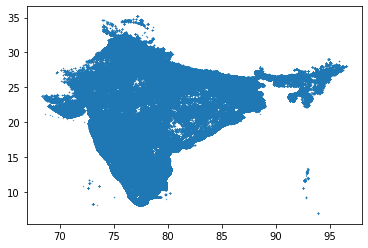

In [11]:
plt.scatter(df["lon"], df["lat"], s=.1)
plt.show()

In [13]:
len(set(df["device_id"]))

774774